# **Sentiment Analysis**
Sentiment analysis (also known as opinion mining or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. <br>
`Sentiment Analysis is implemented on the IMDB Dataset of 50K Movie Reviews here.`

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
pip install bs4

     |████████████████████████████████| 115 kB 4.6 MB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=cdcb723216b52fc67601978119cb353df092a9a737cb70f483ac598b925c62fb
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

['imdb-dataset-of-50k-movie-reviews']


In [4]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import re

In [5]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [6]:
df['sentiment'].value_counts()                          

negative    25000
positive    25000
Name: sentiment, dtype: int64

## Dataset Pre-processing

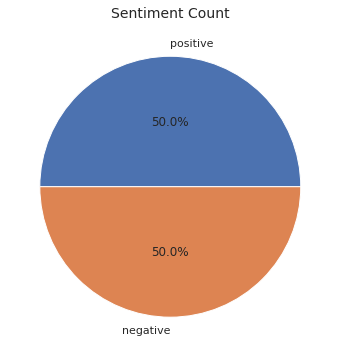

In [7]:
pie, ax = plt.subplots(figsize=[10,6])
positive, negative = df['sentiment'].value_counts()
data = [positive, negative]
labels = df['sentiment'].unique()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Sentiment Count", fontsize=14);

We can observe that the given dataset is balanced w.r.t the target variable count.

In [8]:
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

We remove the HTML tags, square brackets and the noisy text typically don’t add much value towards understanding and analyzing text.

In [9]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

In [10]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)

In [11]:
X = df['review']
y = df['sentiment']

Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. For example, the stem of the words eating, eats, eaten is eat.

Search engines use stemming for indexing the words. That’s why rather than storing all forms of a word, a search engine can store only the stems. In this way, stemming reduces the size of the index and increases retrieval accuracy.

In [12]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

Then we remove the stopwords from the dataset. Typically, these can be articles, conjunctions, prepositions and so on. Some examples of stopwords are a, an, the, and but.

In [13]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{'each', 'them', 'ourselves', 'other', 'below', "shouldn't", 'theirs', 'him', 'some', 'both', "she's", 'out', 'being', 'any', 'nor', "mightn't", 'ours', 'it', 'am', "won't", 'once', 'its', 'mightn', 'now', 'a', "don't", 'was', 'how', 'that', "needn't", 'themselves', 'himself', 'his', 'from', 'of', 'up', 'i', "isn't", "weren't", 'the', 'who', 'or', "mustn't", 'into', 'very', 'hadn', 'because', "doesn't", 'on', 'hasn', 'o', 'those', 'with', 'same', 't', "didn't", 'have', 'just', 'had', 'and', 'until', 'so', 'for', 'doing', "should've", 'if', 'yours', 'all', 'y', "you're", 'been', 'aren', 'yourselves', 'couldn', 'while', 'are', 'but', 'off', 'wouldn', 'when', 'an', 'over', 're', "that'll", 'our', 'she', 'doesn', 'has', 'does', 'shouldn', 'at', 'before', "it's", "wasn't", "wouldn't", 'not', 'her', "you've", 'yourself', 've', 'don', 'itself', 'above', 'this', 'where', 'will', 'more', 'me', 'why', 'won', 'to', 'my', 'm', "shan't", 'again', 'can', 'what', 'only', 'whom', 'about', 'their', 'di

In [14]:
df['review']

0        one review ha mention watch 1 Oz episod youll ...
1        wonder littl product film techniqu veri unassu...
2        thought thi wa wonder way spend time hot summe...
3        basic famili littl boy jake think zombi hi clo...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought thi movi right good job wasnt creativ ...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    Im go disagre previou comment side maltin thi ...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

### Word Clouds to observe Positive and Negative words for a speicific review

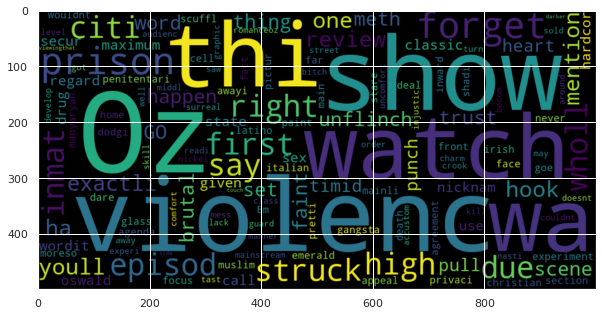

In [15]:
#word cloud for review no. 0 which is positive
plt.figure(figsize=(10,10))
positive_text=df['review'][0]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show()

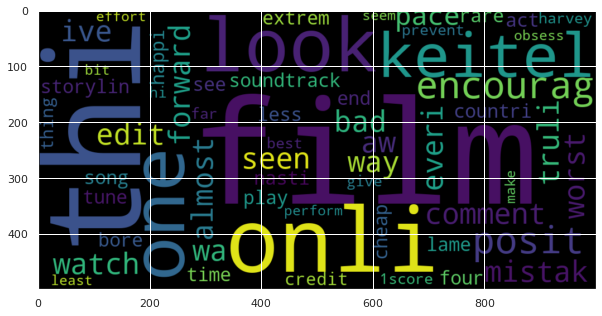

In [16]:
#Word cloud for review no. 7 which is negative
plt.figure(figsize=(10,10))
negative_text=df['review'][8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

## Logistic Regression

The logistic regression model (or logit model) is a binary classification model in which the conditional probability of one of the two possible realizations of the output variable is assumed to be equal to a linear combination of the input variables, transformed by the logistic function.

In [17]:
x_train = df['review'][:40000]
x_test = df['review'][40000:]

In [18]:
#Spliting the sentiment data
train_sentiments=y[:40000]
test_sentiments=y[40000:]

**CountVectorizer**:
CountVectorizer converts a collection of text documents to a matrix of token counts: the occurrences of tokens in each document. This implementation produces a sparse representation of the counts.

In [19]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=2,max_df=0.5,binary=False,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)
print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 551822)
BOW_cv_test: (10000, 551822)


**TF-IDF Vectorizer**: We can further transform a count matrix to a normalized tf: term-frequency or tf-idf: term-frequency times inverse document-frequency representation using TfidfTransformer. The formula that is used to compute the tf-idf for a term t of a document d in a document set is:            
![](https://miro.medium.com/max/360/1*fhqcHXDSfogZ-t3Ya2IQaw.png)

In [20]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=2,max_df=0.5,use_idf=True,ngram_range=(1,2))
#transformed train reviews
tv_train_reviews=tv.fit_transform(x_train)
#transformed test reviews
tv_test_reviews=tv.transform(x_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 551822)
Tfidf_test: (10000, 551822)


In [21]:
cv_train_reviews

<40000x551822 sparse matrix of type '<class 'numpy.int64'>'
	with 6839606 stored elements in Compressed Sparse Row format>

We can observe that the elements are stored in Compressed Sparse Row format.
Here is how the Compressed Sparse Row format (CSR) works : http://www.mathcs.emory.edu/~cheung/Courses/561/Syllabus/3-C/sparse.html

In [22]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [23]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

['negative' 'negative' 'negative' ... 'positive' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [24]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("Accuracy score for bag of words:",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("Accuracy score for tfidf features:",lr_tfidf_score)

Accuracy score for bag of words: 0.8763
Accuracy score for tfidf features: 0.8988


In [25]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.89      0.86      0.87      4993
    Negative       0.87      0.89      0.88      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.90      0.89      0.90      4993
    Negative       0.89      0.91      0.90      5007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [26]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=['positive','negative'])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=['positive','negative'])
print(cm_tfidf)

[[4462  545]
 [ 692 4301]]
[[4535  472]
 [ 540 4453]]


## Multinomial Naive Bayes

Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

In [27]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [28]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [29]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("Accuracy score for bag of words:",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("Accuracy score for tfidf features:",mnb_tfidf_score)

Accuracy score for bag of words: 0.8806
Accuracy score for tfidf features: 0.8897


In [30]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.86      0.91      0.88      4993
    Negative       0.90      0.86      0.88      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.88      0.90      0.89      4993
    Negative       0.90      0.88      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [31]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=['positive','negative'])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=['positive','negative'])
print(cm_tfidf)

[[4281  726]
 [ 468 4525]]
[[4406  601]
 [ 502 4491]]


## Voting Classifier

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of the TF-IDF Logistic Regression and TF-IDF Multinomial NB classifiers passed into Voting Classifier and predicts the output class based on the highest majority of voting. 

In [32]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[("lr_tfidf", lr_tfidf), ("mnb_tfidf", mnb_tfidf)],
                        voting='hard')

In [33]:
eclf.fit(cv_train_reviews,train_sentiments)

VotingClassifier(estimators=[('lr_tfidf',
                              LogisticRegression(C=1, max_iter=500,
                                                 random_state=42)),
                             ('mnb_tfidf', MultinomialNB())])

In [34]:
#Predicting the model for bag of words
eclf_cv_predict=eclf.predict(cv_test_reviews)
print(eclf_cv_predict)
##Predicting the model for tfidf features
eclf_tfidf_predict=eclf.predict(tv_test_reviews)
print(eclf_tfidf_predict)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [35]:
#Accuracy score for bag of words
eclf_cv_score=accuracy_score(test_sentiments,eclf_cv_predict)
print("Accuracy score for bag of words:",eclf_cv_score)
#Accuracy score for tfidf features
eclf_tfidf_score=accuracy_score(test_sentiments,eclf_tfidf_predict)
print("Accuracy score for tfidf features:",eclf_tfidf_score)

Accuracy score for bag of words: 0.889
Accuracy score for tfidf features: 0.8963


## LSTM

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning. <br><br>
<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" alt="drawing" height="400" width="800"/>

In [36]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
X=X.apply(remove_stopwords)

{'each', 'them', 'ourselves', 'other', 'below', "shouldn't", 'theirs', 'him', 'some', 'both', "she's", 'out', 'being', 'any', 'nor', "mightn't", 'ours', 'it', 'am', "won't", 'once', 'its', 'mightn', 'now', 'a', "don't", 'was', 'how', 'that', "needn't", 'themselves', 'himself', 'his', 'from', 'of', 'up', 'i', "isn't", "weren't", 'the', 'who', 'or', "mustn't", 'into', 'very', 'hadn', 'because', "doesn't", 'on', 'hasn', 'o', 'those', 'with', 'same', 't', "didn't", 'have', 'just', 'had', 'and', 'until', 'so', 'for', 'doing', "should've", 'if', 'yours', 'all', 'y', "you're", 'been', 'aren', 'yourselves', 'couldn', 'while', 'are', 'but', 'off', 'wouldn', 'when', 'an', 'over', 're', "that'll", 'our', 'she', 'doesn', 'has', 'does', 'shouldn', 'at', 'before', "it's", "wasn't", "wouldn't", 'not', 'her', "you've", 'yourself', 've', 'don', 'itself', 'above', 'this', 'where', 'will', 'more', 'me', 'why', 'won', 'to', 'my', 'm', "shan't", 'again', 'can', 'what', 'only', 'whom', 'about', 'their', 'di

In [37]:
df['review'] = X
df['sentiment'] = y

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2)

In [39]:
y_train = (y_train.replace({'positive': 1, 'negative': 0})).values
y_test = (y_test.replace({'positive': 1, 'negative': 0})).values

In [40]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [41]:
# ENCODE REVIEW
token = Tokenizer(lower=False)
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[5711   37    1 ...   58   65 1066]
 [ 644 2679    1 ... 2456    0    0]
 [   1    4    3 ...    0    0    0]
 ...
 [   6 3199 1410 ...    0    0    0]
 [  16    1    2 ...    0    0    0]
 [ 110   47  836 ...  116   47 3586]] 

Encoded X Test
 [[   37   332   565 ...    49  2621  7347]
 [  787     7    77 ...  1007   196     9]
 [ 1171 16956  6383 ...     0     0     0]
 ...
 [  854    10   195 ...     0     0     0]
 [  387  1584   610 ...     0     0     0]
 [ 3085 11024  1704 ...     0     0     0]] 

Maximum review length:  129


In [42]:
# # ARCHITECTURE
# EMBED_DIM = 32
# LSTM_OUT = 64

# model = Sequential()
# model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
# model.add(LSTM(LSTM_OUT))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# print(model.summary())

In [43]:
import tensorflow as tf
# ARCHITECTURE
EMBED_DIM = 64
LSTM_OUT = 128
#multi-layer lstm
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=total_words,
        output_dim=EMBED_DIM,
        mask_zero=True,
        input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 129, 64)           10031744  
_________________________________________________________________
bidirectional (Bidirectional (None, 129, 128)          66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 10,143,233
Trainable params: 10,143,233
Non-trainable params: 0
____________________________________________

In [44]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adamax(1e-3),
              metrics=['accuracy'])

In [45]:
model.fit(x_train, y_train, batch_size = 128, epochs = 5)

Epoch 1/5
313/313 [==============================] - 31s 49ms/step - loss: 0.5609 - accuracy: 0.6454
Epoch 2/5
313/313 [==============================] - 15s 47ms/step - loss: 0.2829 - accuracy: 0.8782
Epoch 3/5
313/313 [==============================] - 14s 46ms/step - loss: 0.2318 - accuracy: 0.9056
Epoch 4/5
313/313 [==============================] - 15s 48ms/step - loss: 0.1928 - accuracy: 0.9264
Epoch 5/5
313/313 [==============================] - 14s 46ms/step - loss: 0.1550 - accuracy: 0.9415


In [46]:
y_pred = model.predict_classes(x_test, batch_size = 128)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

Correct Prediction: 8715
Wrong Prediction: 1285
Accuracy: 87.15
